In [1]:
"""
MNIST Example
"""
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import csv as csv
import pandas as pd
import sys

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [2]:
#read csv
with open("Data/CleanData.csv", 'rb') as f:
    mycsv = csv.reader(f)
    mycsv = list(mycsv)
    
UData = np.array(mycsv)

print(len(UData))
print(UData[0])


8983
['ID' 'Distance' 'Class' 'Number of Horses in R' 'Gait' 'Track_Cond' 'PP'
 'Meds' 'last race' 'second last race' 'third last race' 'new horse'
 'horse win per' 'jockey win per' 'trainer win per' 'Odds' 'payout1'
 'payout2' 'payout3' 'payout4' 'payout5' 'payout6' 'place']


In [3]:
print(UData[3:,-1])

['4' '5' '6' ..., '5' '6' '7']


In [4]:
categ = [1,2,4,5,7]
total_vocab = []
num_vocab = []
for y in categ:
    vocab = []
    for x in range(1, len(UData)):
        if UData[x][y] not in vocab:
            vocab.append(UData[x][y])
    total_vocab.append(vocab)
    num_vocab.append(len(vocab))
print(total_vocab)
print(num_vocab)

var_num = 0
text_file = open("Data/Distances.txt", "w")
num_distances = num_vocab[var_num]
for y in range(num_distances):
    text_file.write("%s\n" % total_vocab[var_num][y])
    
text_file.close()

var_num = 1
text_file = open("Data/Classes.txt", "w")
num_classes = num_vocab[var_num]
for y in range(num_classes):
    text_file.write("%s\n" % total_vocab[var_num][y])
text_file.close()

var_num = 2
text_file = open("Data/Gaits.txt", "w")
num_gaits = num_vocab[var_num]
for y in range(num_gaits):
    text_file.write("%s\n" % total_vocab[var_num][y])
text_file.close()

var_num = 3
text_file = open("Data/Track Conditions.txt", "w")
num_track_conditions = num_vocab[var_num]
for y in range(num_track_conditions):
    text_file.write("%s\n" % total_vocab[var_num][y])
text_file.close()

var_num = 4
text_file = open("Data/Medicines.txt", "w")
num_medicines = num_vocab[var_num]
for y in range(num_medicines):
    text_file.write("%s\n" % total_vocab[var_num][y])
text_file.close()

[['1_Mile', 'Dis:_1', '5000_Dis:', 'FM_Dis:'], ['NW800PSL5', 'W3-5PMLT', 'NW200PSL5', 'NW3000L3CD', 'NW600PSCD', 'NW250PSCD', '4000CL', 'NW400PSCD', 'MADC', '3000CLCD', 'NW250PSL5', '4000CLCD', 'NW1500L5CD', 'FFA', 'FMNW400PS', 'FM4000CLCD', 'FMNW800PS', 'NW3PMLT', 'FMNW1500L5', 'NW800PSCD', 'NW1501L5CD', 'FMNW1001L5', 'NW1001L5CD', 'NW1001L5', 'NW1PMLT', 'FMNW1251L5', 'FMNW1751L5', 'MSBS', 'FMW3-5PMLT', 'NW2PMLT', 'NW1751L5CD', 'NW600PSL5', 'NW400PSL5', 'NW1251L5CD', 'W3-6PMLT', 'NPO', 'FMW3-6PMLT', 'FMNW250PS', 'NW251PSL5', '3000CL', 'FMNW600PS', 'FM3000CLCD', 'FMNW251PS', 'FM4000CL', 'W3-6PMLTCD', 'NW3PMLTCD', 'NW600L5CD', 'WO', 'FMNW1000L5', 'NW1000L5CD', 'FM', 'FMNW1500', 'FM3000CL', 'NW251PSCD', 'FMNW1001L4', 'NW1001L4CD', 'FMNW1251L4', '3000CLNW', 'NW1251L4CD', 'NW750L5CD', '3-4000CLHC', 'NW1IN2015', 'FMNW1501L5', 'NW2IN2015', 'NW1PMLTCD', 'NW2PMLTCD', '5000CL', 'W2-5PMLT', 'W6-8PMLT', 'NW750L5', 'FM3500CL', '3500CLCD', '3500CL', 'FM3500CLCD', 'W2-5PMLTCD', 'W3-8PMLT', 'W4-6PMLT

In [5]:
def win(x):
    if int(x[-1]) == 1:
        x[-1] = 1
    else:
        x[-1] = 0
    return x

In [6]:
id_split = "2017032550"
id_split[:4]

'2017'

In [7]:
def train(x):
    if int(x[0]) < int(id_split):
        return True
    return False

In [8]:
#Convert Place to win 
UData = np.vstack((UData[0], [win(x) for x in UData[1:]]))

In [9]:

trainX = np.array([x for x in UData[1:,:-7] if train(x)])
testX = np.array([x for x in UData[1:,:-7] if not train(x)]) 
trainY = np.array([win(y) for y in y if train(y)])
testY = np.array([win(y) for y in UData[1:,(0,-1)] if not train(y)])
print(len(trainX))
print(len(trainY))
print(len(testX))
print(len(testY))

TypeError: 'int' object is not iterable

In [44]:
#X = np.delete(UData, -1, axis=1)[1:-1]
#Y = [win(x) for x in UData[1:-1,-1]]
#print('tX', X[0])
#print('tY', Y[0])
#print(len(X))
#print(len(Y))

In [45]:
zero_weight = .18
one_weight = .82
train_weights = np.array(trainY[:,1]).astype(float)
for x in range(len(trainY)):
    if train_weights[x] == 0:
        train_weights[x] = zero_weight
    elif train_weights[x] == 1:
        train_weights[x] = one_weight
    else:
        print("\n\nERROR\n\n")
        
test_weights = np.array(testY[:,1]).astype(float)
for x in range(len(testY)):
    if test_weights[x] == 0:
        test_weights[x] = zero_weight
    elif test_weights[x] == 1:
        test_weights[x] = one_weight
    else:
        print("\n\nERROR\n\n")
    

In [47]:
#import tensorflow as tf
#import numpy as np

#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets('MNIST_data')

#def input(dataset):
#    return dataset

# Specify feature
#feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
print("1Here")
weight_column = tf.feature_column.numeric_column(key = 'weight')

distance_col = tf.feature_column.categorical_column_with_vocabulary_file(key="Distance", vocabulary_file="Data/Distances.txt",
                                                                                vocabulary_size=num_distances)
class_col = tf.feature_column.categorical_column_with_vocabulary_file(key="Class", vocabulary_file="Data/Classes.txt",
                                                                                vocabulary_size=num_classes)
gait_col  = tf.feature_column.categorical_column_with_vocabulary_file(key="Gait", vocabulary_file="Data/Gaits.txt",
                                                                                 vocabulary_size=num_gaits)
track_condition_col = tf.feature_column.categorical_column_with_vocabulary_file(key="TC", vocabulary_file="Data/Track Conditions.txt",
                                                                                vocabulary_size=num_track_conditions)
post_position_col = tf.feature_column.categorical_column_with_identity(key="PP", num_buckets=10)
new_horse_col = tf.feature_column.categorical_column_with_identity(key="NewH", num_buckets=2)
medicine_col  = tf.feature_column.categorical_column_with_vocabulary_file(key="Medicine", vocabulary_file="Data/Medicines.txt",
                                                                                vocabulary_size=num_medicines)
feature_columns = [tf.feature_column.indicator_column(distance_col),
                   tf.feature_column.indicator_column(class_col),
                   tf.feature_column.numeric_column(key="NH"),
                   tf.feature_column.indicator_column(gait_col),
                   tf.feature_column.indicator_column(track_condition_col),
                   tf.feature_column.indicator_column(post_position_col),
                   tf.feature_column.indicator_column(medicine_col),
                   tf.feature_column.numeric_column(key="1F"),
                   tf.feature_column.numeric_column(key="2F"),
                   tf.feature_column.numeric_column(key="3F"),
                   tf.feature_column.indicator_column(new_horse_col),
                   tf.feature_column.numeric_column(key="HWP"),
                   tf.feature_column.numeric_column(key="JWP"),
                   tf.feature_column.numeric_column(key="TWP")
                  ]
print("4Here")


# Build 2 layer DNN classifier
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=np.full((100),5),
    optimizer=tf.train.AdamOptimizer(1e-5),
    n_classes=2,
    weight_column = weight_column
    #warm_start_from = "/var/folders/tx/t5mjmx9d5vvg8r4r62w32mg80000gn/T/tmpINcd1R/"
)
print("5Here")


train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"weight": train_weights,
       "Distance": trainX[:,1], 
       "Class": trainX[:,2], 
       "NH": trainX[:,3].astype(int), 
       "Gait": trainX[:,4], 
       "TC": trainX[:,5],
       "PP": trainX[:,6].astype(int), 
       "Medicine": trainX[:,7], 
       "1F": trainX[:,8].astype(int), 
       "2F": trainX[:,9].astype(int), 
       "3F": trainX[:,10].astype(int), 
       "NewH": trainX[:,11].astype(int), 
       "HWP": trainX[:,12].astype(float), 
       "JWP": trainX[:,13].astype(float), 
       "TWP": trainX[:,14].astype(float), 
       },
    y=trainY[:,-1].astype(int),
    num_epochs=50000,
    shuffle=True,
)
print("6Here")


classifier.train(input_fn = train_input_fn, steps=50000)
print("7Here")


def test_set():
    return np.array(nX[:,1], float32)
print("8Here")

# Define the test inputs
test_input_fn = tf.estimator.inputs.numpy_input_fn(
     x={"weight": test_weights,
        "Distance": testX[:,1], 
       "Class": testX[:,2], 
       "NH": testX[:,3].astype(int), 
       "Gait": testX[:,4], 
       "TC": testX[:,5],
       "PP": testX[:,6].astype(int), 
       "Medicine": testX[:,7], 
       "1F": testX[:,8].astype(int), 
       "2F": testX[:,9].astype(int), 
       "3F": testX[:,10].astype(int), 
       "NewH": testX[:,11].astype(int), 
       "HWP": testX[:,12].astype(float), 
       "JWP": testX[:,13].astype(float), 
       "TWP": testX[:,14].astype(float), 
       },
    y=testY[:,-1].astype(int),
    num_epochs=1,
    shuffle=False
)
    
    


# Evaluate accuracy
accuracy_score = classifier.evaluate(input_fn=test_input_fn)["accuracy"]
print("\nTest Accuracy: {0:f}%\n".format(accuracy_score*100))
print("10Here")




1Here
4Here
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_train_distribute': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1255eadd0>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/tx/t5mjmx9d5vvg8r4r62w32mg80000gn/T/tmpzc4xh3', '_global_id_in_cluster': 0, '_save_summary_steps': 100}
5Here
6Here
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1

INFO:tensorflow:global_step/sec: 176.864
INFO:tensorflow:loss = 27.11818, step = 7201 (0.565 sec)
INFO:tensorflow:global_step/sec: 173.08
INFO:tensorflow:loss = 24.779524, step = 7301 (0.578 sec)
INFO:tensorflow:global_step/sec: 173.57
INFO:tensorflow:loss = 21.96954, step = 7401 (0.576 sec)
INFO:tensorflow:global_step/sec: 174.86
INFO:tensorflow:loss = 23.37268, step = 7501 (0.572 sec)
INFO:tensorflow:global_step/sec: 176.638
INFO:tensorflow:loss = 23.839928, step = 7601 (0.566 sec)
INFO:tensorflow:global_step/sec: 173.027
INFO:tensorflow:loss = 26.65348, step = 7701 (0.578 sec)
INFO:tensorflow:global_step/sec: 177.36
INFO:tensorflow:loss = 25.715164, step = 7801 (0.564 sec)
INFO:tensorflow:global_step/sec: 176.01
INFO:tensorflow:loss = 24.775652, step = 7901 (0.568 sec)
INFO:tensorflow:global_step/sec: 174.072
INFO:tensorflow:loss = 24.304981, step = 8001 (0.574 sec)
INFO:tensorflow:global_step/sec: 177.385
INFO:tensorflow:loss = 25.244745, step = 8101 (0.564 sec)
INFO:tensorflow:glo

INFO:tensorflow:global_step/sec: 175.252
INFO:tensorflow:loss = 24.739399, step = 15501 (0.570 sec)
INFO:tensorflow:global_step/sec: 177.31
INFO:tensorflow:loss = 26.213074, step = 15601 (0.564 sec)
INFO:tensorflow:global_step/sec: 176.05
INFO:tensorflow:loss = 24.738731, step = 15701 (0.568 sec)
INFO:tensorflow:global_step/sec: 177.33
INFO:tensorflow:loss = 22.771101, step = 15801 (0.564 sec)
INFO:tensorflow:global_step/sec: 179.889
INFO:tensorflow:loss = 28.182768, step = 15901 (0.556 sec)
INFO:tensorflow:global_step/sec: 178.681
INFO:tensorflow:loss = 20.30677, step = 16001 (0.560 sec)
INFO:tensorflow:global_step/sec: 174.258
INFO:tensorflow:loss = 28.6782, step = 16101 (0.574 sec)
INFO:tensorflow:global_step/sec: 178.056
INFO:tensorflow:loss = 26.215649, step = 16201 (0.562 sec)
INFO:tensorflow:global_step/sec: 175.315
INFO:tensorflow:loss = 25.722988, step = 16301 (0.570 sec)
INFO:tensorflow:global_step/sec: 175.599
INFO:tensorflow:loss = 24.24319, step = 16401 (0.570 sec)
INFO:te

INFO:tensorflow:loss = 24.211039, step = 23701 (0.580 sec)
INFO:tensorflow:global_step/sec: 171.039
INFO:tensorflow:loss = 30.328829, step = 23801 (0.584 sec)
INFO:tensorflow:global_step/sec: 174.249
INFO:tensorflow:loss = 23.700296, step = 23901 (0.574 sec)
INFO:tensorflow:global_step/sec: 175.332
INFO:tensorflow:loss = 24.210003, step = 24001 (0.570 sec)
INFO:tensorflow:global_step/sec: 179.214
INFO:tensorflow:loss = 20.636621, step = 24101 (0.558 sec)
INFO:tensorflow:global_step/sec: 178.043
INFO:tensorflow:loss = 22.677446, step = 24201 (0.562 sec)
INFO:tensorflow:global_step/sec: 179.843
INFO:tensorflow:loss = 25.230705, step = 24301 (0.556 sec)
INFO:tensorflow:global_step/sec: 178.935
INFO:tensorflow:loss = 21.65364, step = 24401 (0.559 sec)
INFO:tensorflow:global_step/sec: 177.431
INFO:tensorflow:loss = 24.208393, step = 24501 (0.564 sec)
INFO:tensorflow:global_step/sec: 176.747
INFO:tensorflow:loss = 23.696655, step = 24601 (0.566 sec)
INFO:tensorflow:global_step/sec: 177.876
I

INFO:tensorflow:global_step/sec: 179.235
INFO:tensorflow:loss = 22.61779, step = 32001 (0.558 sec)
INFO:tensorflow:global_step/sec: 175.136
INFO:tensorflow:loss = 19.471966, step = 32101 (0.571 sec)
INFO:tensorflow:global_step/sec: 177.124
INFO:tensorflow:loss = 25.762726, step = 32201 (0.564 sec)
INFO:tensorflow:global_step/sec: 177.866
INFO:tensorflow:loss = 24.713978, step = 32301 (0.562 sec)
INFO:tensorflow:global_step/sec: 175.751
INFO:tensorflow:loss = 25.763226, step = 32401 (0.569 sec)
INFO:tensorflow:global_step/sec: 175.598
INFO:tensorflow:loss = 24.189129, step = 32501 (0.570 sec)
INFO:tensorflow:global_step/sec: 175.78
INFO:tensorflow:loss = 27.863564, step = 32601 (0.569 sec)
INFO:tensorflow:global_step/sec: 177.858
INFO:tensorflow:loss = 26.289137, step = 32701 (0.563 sec)
INFO:tensorflow:global_step/sec: 178.447
INFO:tensorflow:loss = 22.612934, step = 32801 (0.560 sec)
INFO:tensorflow:global_step/sec: 178.075
INFO:tensorflow:loss = 23.13768, step = 32901 (0.562 sec)
INF

INFO:tensorflow:loss = 24.713531, step = 40201 (0.602 sec)
INFO:tensorflow:global_step/sec: 146.744
INFO:tensorflow:loss = 24.713543, step = 40301 (0.681 sec)
INFO:tensorflow:global_step/sec: 159.185
INFO:tensorflow:loss = 25.783302, step = 40401 (0.630 sec)
INFO:tensorflow:global_step/sec: 150.5
INFO:tensorflow:loss = 29.528408, step = 40501 (0.663 sec)
INFO:tensorflow:global_step/sec: 140.945
INFO:tensorflow:loss = 24.178497, step = 40601 (0.709 sec)
INFO:tensorflow:global_step/sec: 169.292
INFO:tensorflow:loss = 21.502441, step = 40701 (0.591 sec)
INFO:tensorflow:global_step/sec: 153.579
INFO:tensorflow:loss = 21.501837, step = 40801 (0.651 sec)
INFO:tensorflow:global_step/sec: 172.395
INFO:tensorflow:loss = 23.642792, step = 40901 (0.580 sec)
INFO:tensorflow:global_step/sec: 176.552
INFO:tensorflow:loss = 22.036049, step = 41001 (0.567 sec)
INFO:tensorflow:global_step/sec: 143.451
INFO:tensorflow:loss = 28.463112, step = 41101 (0.699 sec)
INFO:tensorflow:global_step/sec: 165.325
IN

INFO:tensorflow:global_step/sec: 174.106
INFO:tensorflow:loss = 23.630606, step = 48501 (0.574 sec)
INFO:tensorflow:global_step/sec: 175.084
INFO:tensorflow:loss = 23.088036, step = 48601 (0.571 sec)
INFO:tensorflow:global_step/sec: 174.92
INFO:tensorflow:loss = 24.172913, step = 48701 (0.572 sec)
INFO:tensorflow:global_step/sec: 177.412
INFO:tensorflow:loss = 24.172863, step = 48801 (0.564 sec)
INFO:tensorflow:global_step/sec: 176.629
INFO:tensorflow:loss = 23.087408, step = 48901 (0.566 sec)
INFO:tensorflow:global_step/sec: 176.132
INFO:tensorflow:loss = 27.429432, step = 49001 (0.567 sec)
INFO:tensorflow:global_step/sec: 176.115
INFO:tensorflow:loss = 23.629898, step = 49101 (0.568 sec)
INFO:tensorflow:global_step/sec: 176.845
INFO:tensorflow:loss = 26.344418, step = 49201 (0.565 sec)
INFO:tensorflow:global_step/sec: 175.657
INFO:tensorflow:loss = 26.887672, step = 49301 (0.569 sec)
INFO:tensorflow:global_step/sec: 171.266
INFO:tensorflow:loss = 25.801815, step = 49401 (0.584 sec)
I

In [51]:
prob_bet = .4

ds_predict_tf = classifier.predict(input_fn = test_input_fn)
print('Predictions: {}'.format(str(ds_predict_tf)))
z = 0
bank = 0
bank_history = []
bank_history.append(bank)
for i in ds_predict_tf:
    #print("predict")
    if i['probabilities'][1] > prob_bet:
        bank -= 2
        if int(testY[z][1]) == 1:
            temp = [y for y in UData if testY[z][0] == y[0]]
            
            bank += float(temp[0][-7])
            print("\nWINNING BET")
            print("Neural Net Probability", i['probabilities'][1])
            print(temp)
            print("odds", temp[0][-7])
        else:
            print("\nLOSING BET")
            print("Neural Net Probability", i['probabilities'][1])
        bank_history.append(bank)

            
            
        
        print("New amount", bank)
    z += 1
print("final",bank)

Predictions: <generator object predict at 0x130872fa0>
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/tx/t5mjmx9d5vvg8r4r62w32mg80000gn/T/tmpzc4xh3/model.ckpt-50000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.

WINNING BET
('Neural Net Probability', 0.45169532)
[array(['20140629101', '1_Mile', 'FM4000CLCD', '7', 'Pace', 'FT', '4', 'L',
       '1', '4', '2', '0', '0.0', '0.0', '0.0', '0.4', '5.40', '3.40',
       '2.80', '16.20', '4.60', '3.60', '1'], dtype='|S21')]
('odds', '5.40')
('New amount', 3.4000000000000004)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', 1.4000000000000004)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -0.5999999999999996)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -2.5999999999999996)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amoun

('odds', '5.60')
('New amount', -191.20000000000002)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -193.20000000000002)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -195.20000000000002)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -197.20000000000002)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -199.20000000000002)

WINNING BET
('Neural Net Probability', 0.45169532)
[array(['2017040981', '1_Mile', 'FMNW400PS', '8', 'Pace', 'FT', '4', 'L',
       '2', '1', '7', '0', '0.0', '0.12224448897795591',
       '0.14838709677419354', '0.285714285714', '5.40', '2.60', '2.60',
       '3.20', '2.60', '2.80', '1'], dtype='|S21')]
('odds', '5.40')
('New amount', -195.8)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -197.8)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -199.8)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -201.8)

LOSING BET
('Neural Net Proba

('Neural Net Probability', 0.45169532)
('New amount', -253.20000000000002)

WINNING BET
('Neural Net Probability', 0.45169532)
[array(['2017051141', '1_Mile', '3500CL', '6', 'Pace', 'FT', '3', 'L', '1',
       '6', '1', '0', '0.0', '0.17293233082706766', '0.2625', '0.5',
       '5.00', '3.40', '2.80', '3.40', '2.40', '6.20', '1'], dtype='|S21')]
('odds', '5.00')
('New amount', -250.20000000000002)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -252.20000000000002)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -254.20000000000002)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -256.20000000000005)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -258.20000000000005)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -260.20000000000005)

WINNING BET
('Neural Net Probability', 0.45169532)
[array(['2017051151', '1_Mile', '3500CLCD', '5', 'Pace', 'FT', '5', 'L',
       '2', '6', '3', '0', '0.0', '0.17

('odds', '5.60')
('New amount', -274.80000000000007)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -276.80000000000007)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -278.80000000000007)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -280.80000000000007)

WINNING BET
('Neural Net Probability', 0.45169532)
[array(['2017060111', '1_Mile', 'NW400PSL5', '5', 'Trot', 'GD', '1', 'NA',
       '2', '2', '4', '0', '0.0', '0.12485414235705951',
       '0.14788732394366197', '0.5', '6.80', '7.00', '9.80', '3.20',
       '2.40', '9.80', '1'], dtype='|S21')]
('odds', '6.80')
('New amount', -276.00000000000006)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -278.00000000000006)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -280.00000000000006)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -282.00000000000006)

WINNING BET
('Neural Net Probability', 0.45169532)
[array(['2017060121', '

('Neural Net Probability', 0.45169532)
('New amount', -515.6000000000003)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -517.6000000000003)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -519.6000000000003)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -521.6000000000003)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -523.6000000000003)

WINNING BET
('Neural Net Probability', 0.45169532)
[array(['2017063071', 'Dis:_1', 'MSBS', '7', 'Pace', 'Cond:', '7', 'NA',
       '1', '1', '4', '1', '0.14986750417116498', '0.2490842490842491',
       '0.24242424242424243', '0.5', '3.60', '2.80', '2.10', '2.80',
       '2.20', '2.60', '1'], dtype='|S21')]
('odds', '3.60')
('New amount', -522.0000000000002)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -524.0000000000002)

LOSING BET
('Neural Net Probability', 0.45169532)
('New amount', -526.0000000000002)

LOSING BET
('Neural Net Probability', 0.4516953

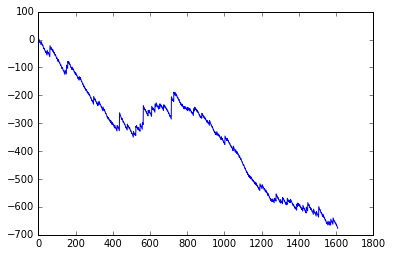

In [52]:
import matplotlib.pyplot as plt
plt.plot(bank_history) # plotting by columns

plt.show()